Importing Necessary Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn
import matplotlib.pyplot as plt
import talib

load the dataset

In [22]:
data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')

prepare the data

In [23]:
# Check the DataFrame and ensure it includes necessary columns
print(data.head())
print(data.info())
print(data.isnull().sum())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non

In [25]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
print(data.info())
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB
None
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


Apply Analysis Indicators with TA-Lib

In [26]:

# Simple Moving Average (SMA)
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)

# Exponential Moving Average (EMA)
data['EMA_20'] = talib.EMA(data['Close'], timeperiod=20)

# Relative Strength Index (RSI)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


In [27]:
# Drop rows with NaN values that may have been introduced by the indicators
data = data.dropna()

print(data[['Date', 'Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].head())


         Date     Close    SMA_20    EMA_20        RSI      MACD  MACD_signal  \
33 1981-01-30  0.126116  0.140681  0.139135  39.642837 -0.000377     0.001789   
34 1981-02-02  0.118862  0.139090  0.137205  34.943807 -0.001930     0.001045   
35 1981-02-03  0.123326  0.138058  0.135883  39.682098 -0.002769     0.000282   
36 1981-02-04  0.127790  0.137556  0.135112  44.069116 -0.003038    -0.000382   
37 1981-02-05  0.127790  0.137193  0.134415  44.069116 -0.003215    -0.000949   

    MACD_hist  
33  -0.002166  
34  -0.002975  
35  -0.003051  
36  -0.002656  
37  -0.002266  


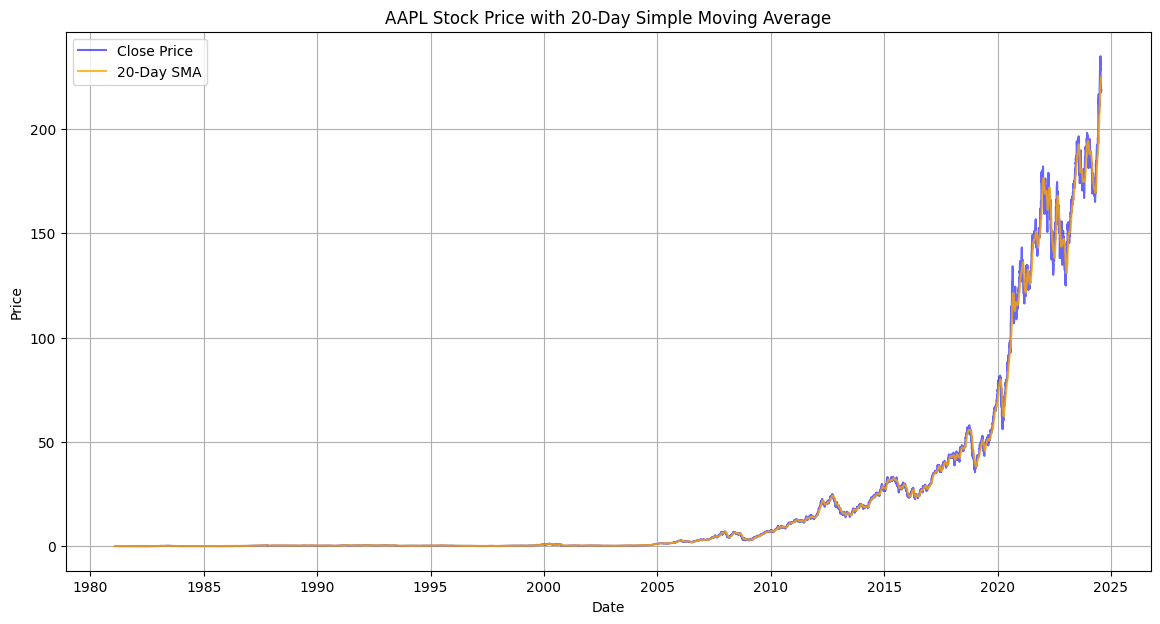

In [28]:
# Plot the Close price and SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['Date'], data['SMA_20'], label='20-Day SMA', color='orange', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price with 20-Day Simple Moving Average')
plt.legend()
plt.grid(True)
plt.show()

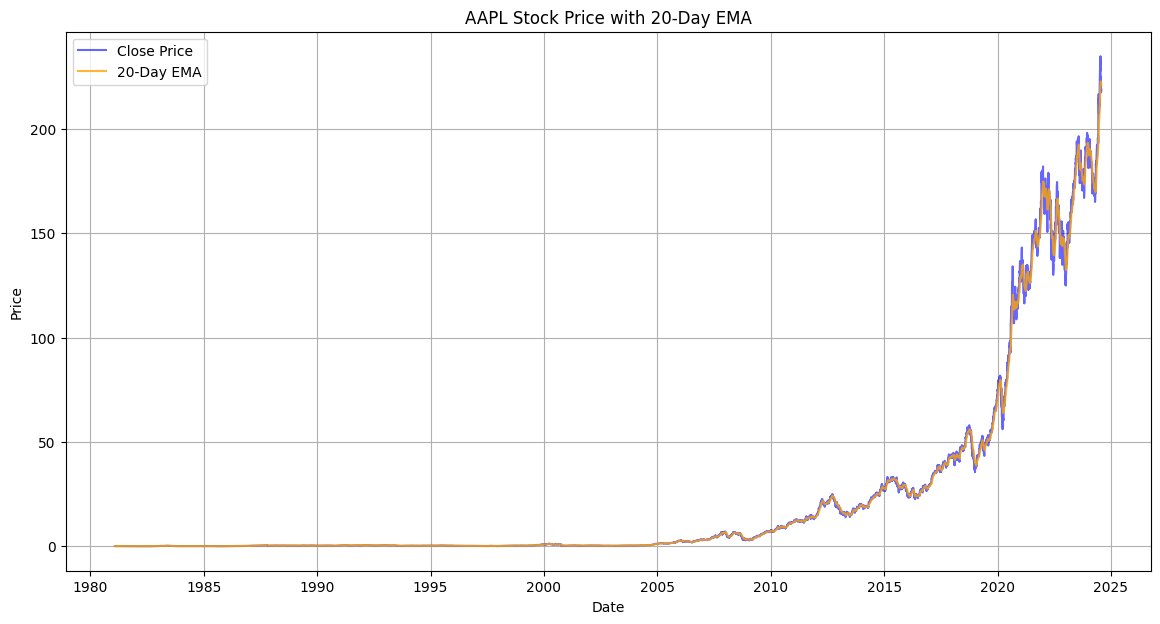

In [29]:
# Plot Close Price and EMA
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['Date'], data['EMA_20'], label='20-Day EMA', color='orange', alpha=0.8)
plt.title('AAPL Stock Price with 20-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

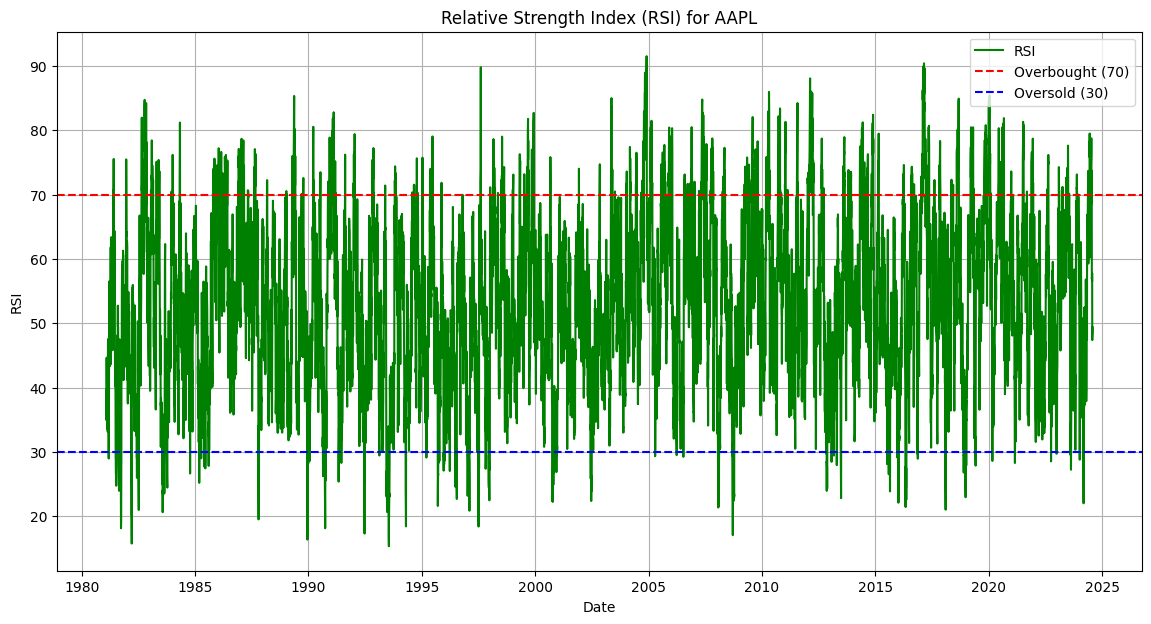

In [30]:
# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['RSI'], label='RSI', color='green')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='blue', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for AAPL')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

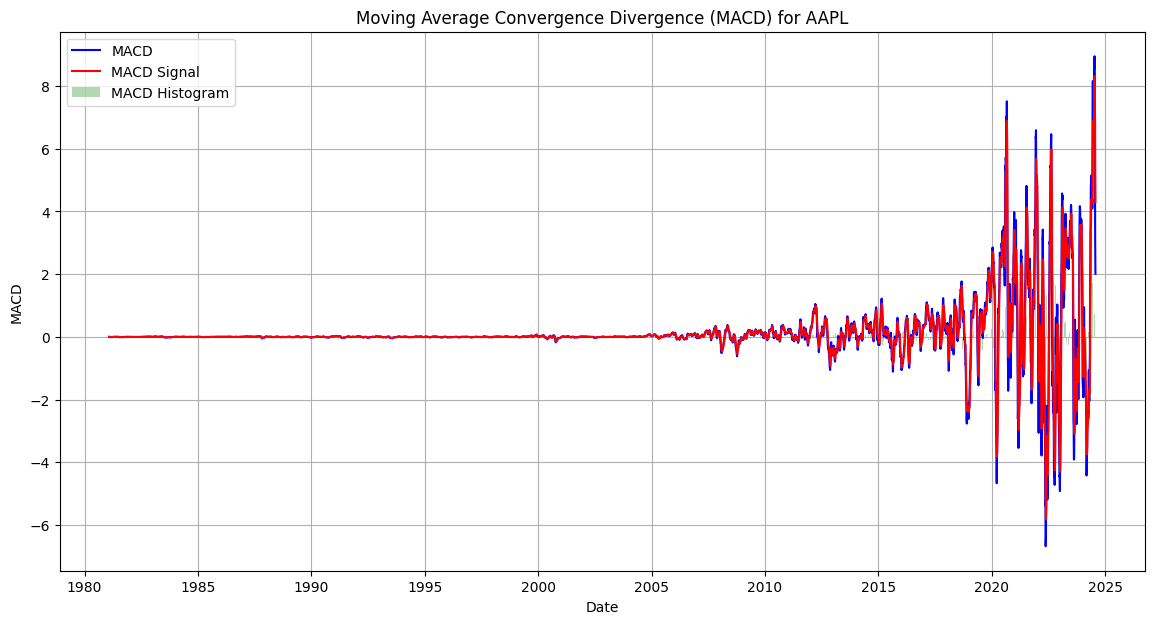

In [31]:
# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['MACD'], label='MACD', color='blue')
plt.plot(data['Date'], data['MACD_signal'], label='MACD Signal', color='red')
plt.bar(data['Date'], data['MACD_hist'], label='MACD Histogram', color='green', alpha=0.3)
plt.title('Moving Average Convergence Divergence (MACD) for AAPL')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()